In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_excel("Dataset.xlsx")

In [3]:
df.head()

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,tested_positive
1,1,85,66,29,0,26.6,0.351,31,tested_negative
2,8,183,64,0,0,23.3,0.672,32,tested_positive
3,1,89,66,23,94,28.1,0.167,21,tested_negative
4,0,137,40,35,168,43.1,2.288,33,tested_positive


In [4]:
df.describe()

,preg,plas,pres,skin,insu,mass,pedi,age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    768 non-null    int64  
 1   plas    768 non-null    int64  
 2   pres    768 non-null    int64  
 3   skin    768 non-null    int64  
 4   insu    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
 8   class   768 non-null    object 
dtypes: float64(2), int64(6), object(1)
memory usage: 54.1+ KB


## Splitting the Data

In [6]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
X_train.head()

,preg,plas,pres,skin,insu,mass,pedi,age
60,2,84,0,0,0,0.0,0.304,21
618,9,112,82,24,0,28.2,1.282,50
346,1,139,46,19,83,28.7,0.654,22
294,0,161,50,0,0,21.9,0.254,65
231,6,134,80,37,370,46.2,0.238,46


## Scaling the Data

In [10]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
# Convert scaled arrays back to DataFrame
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [91]:
X_test_scaled_df.head()

,preg,plas,pres,skin,insu,mass,pedi,age
0,0.681856,-0.714020,-0.617127,0.817110,0.934749,0.260736,-0.116372,0.878091
1,-0.526397,-0.276643,0.301916,0.752265,-0.701206,0.480535,-0.954231,-1.035940
2,-0.526397,-0.401608,-0.292759,-1.322774,-0.701206,-0.153005,-0.924520,-1.035940
3,1.285983,-0.432849,0.572222,-1.322774,-0.701206,-0.954627,1.149329,0.095078
4,0.983919,0.473147,1.112835,-1.322774,-0.701206,-0.269369,-0.770021,1.487101


In [13]:
X_train_scaled_df.head()

,preg,plas,pres,skin,insu,mass,pedi,age
0,-0.526397,-1.151398,-3.752683,-1.322774,-0.701206,-4.135256,-0.490735,-1.035940
1,1.588046,-0.276643,0.680345,0.233505,-0.701206,-0.489169,2.415030,1.487101
2,-0.828460,0.566871,-1.265862,-0.090720,0.013448,-0.424522,0.549161,-0.948939
3,-1.130523,1.254179,-1.049617,-1.322774,-0.701206,-1.303720,-0.639291,2.792122
4,0.681856,0.410665,0.572222,1.076490,2.484601,1.838121,-0.686829,1.139095


In [79]:
X_test_scaled_df['age'].skew()

0.9383714096640808

## Logistic Regerssion

In [15]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score,precision_score, recall_score, ConfusionMatrixDisplay, f1_score
from sklearn.linear_model import LogisticRegression

### No hyperParameter Tuning

In [16]:
logreg = LogisticRegression()

In [17]:
logreg.fit(X_train_scaled_df, y_train)

LogisticRegression()

In [18]:
yPred = logreg.predict(X_test_scaled_df)

In [19]:
accuracy = accuracy_score(y_test, yPred)
print("Accuracy:", accuracy)


print("\nClassification Report:")
print(classification_report(y_test, yPred))

print("\nConfusion Matrix:")

Accuracy: 0.7532467532467533

Classification Report:
                 precision    recall  f1-score   support

tested_negative       0.81      0.80      0.81        99
tested_positive       0.65      0.67      0.66        55

       accuracy                           0.75       154
      macro avg       0.73      0.74      0.73       154
   weighted avg       0.76      0.75      0.75       154


Confusion Matrix:


In [20]:
confusion_matrix(y_test, yPred)

array([[79, 20],
       [18, 37]], dtype=int64)

In [21]:
# Evaluate model performance
accuracy = accuracy_score(y_test, yPred)
print("Accuracy:", accuracy)

Accuracy: 0.7532467532467533


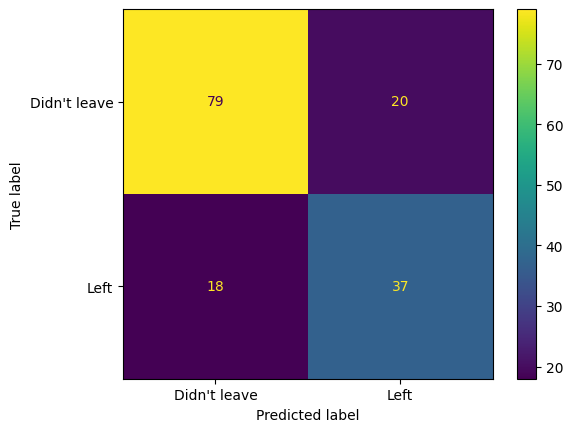

In [22]:
ConfusionMatrixDisplay.from_estimator(logreg, X_test_scaled_df, y_test, values_format = 'd', display_labels = ["Didn't leave", 'Left']);

### HyperParameters Tuning

In [59]:
logreg = LogisticRegression()

In [60]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],      # Regularization parameter
    'solver': ['liblinear', 'saga'] # Solver to use in the optimization
}

In [61]:
# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=80)
grid_search.fit(X_train_scaled_df, y_train)

GridSearchCV(cv=80, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'solver': ['liblinear', 'saga']})

In [62]:

# Get the best hyperparameters and best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [63]:
y_pred = best_model.predict(X_test_scaled_df)

In [64]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.7532467532467533

Classification Report:
                 precision    recall  f1-score   support

tested_negative       0.81      0.80      0.81        99
tested_positive       0.65      0.67      0.66        55

       accuracy                           0.75       154
      macro avg       0.73      0.74      0.73       154
   weighted avg       0.76      0.75      0.75       154


Confusion Matrix:
[[79 20]
 [18 37]]


In [65]:
confusion_matrix(y_test, y_pred)

array([[79, 20],
       [18, 37]], dtype=int64)

In [66]:
# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7532467532467533


In [67]:
# Print classification report
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

tested_negative       0.81      0.80      0.81        99
tested_positive       0.65      0.67      0.66        55

       accuracy                           0.75       154
      macro avg       0.73      0.74      0.73       154
   weighted avg       0.76      0.75      0.75       154



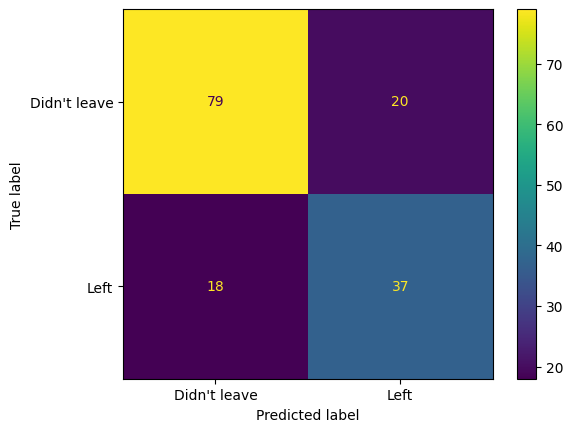

In [68]:
ConfusionMatrixDisplay.from_estimator(grid_search, X_test_scaled_df, y_test, values_format = 'd', display_labels = ["Didn't leave", 'Left']);

## Decision Tree

In [80]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [82]:
param_grid = {
    'max_depth': [8, 12, 16, None],  # None means unlimited depth
    'min_samples_split': [6, 12, 28],
    'min_samples_leaf': [4, 8, 16]
}

In [83]:
clf = DecisionTreeClassifier(random_state=42)

In [98]:
grid_search_clf = GridSearchCV(estimator=clf, param_grid=param_grid, cv=50)
grid_search_clf.fit(X_train_scaled_df, y_train)

GridSearchCV(cv=50, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [8, 12, 16, None],
                         'min_samples_leaf': [4, 8, 16],
                         'min_samples_split': [6, 12, 28]})

In [99]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [100]:
clf.fit(X_train_scaled_df, y_train)

DecisionTreeClassifier(random_state=42)

In [101]:
y_pred = clf.predict(X_test_scaled_df)


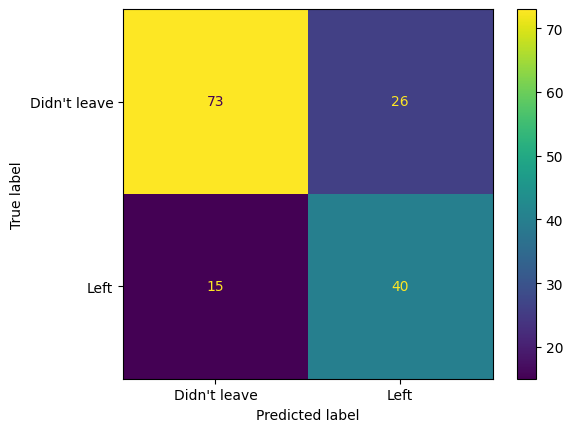

In [102]:
ConfusionMatrixDisplay.from_estimator(grid_search_clf, X_test_scaled_df, y_test, values_format = 'd', display_labels = ["Didn't leave", 'Left']);

In [103]:
accuracy_score(y_test, y_pred)

0.7467532467532467